### sample code for interaction diffusion model

#### import some packages

In [1]:
import numpy as np
import torch
import torch.functional as f
import torch.nn as nn
import torch.optim as optim
import math
import pandas as pd
from net.ddim import ddim_generator
from utils.dataset import data_gen_dyadic_pose, dataset
import pathlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### setup dataset and declaration of IDM

In [ ]:
# the dataset structure
# A and B indicate particpants. numerical values mean keypoint of mediapipe landmarker. audio features are the maximum power during previous 100 ms. 
#['A_pose_0_x', 'A_pose_0_y', 'A_pose_2_x', 'A_pose_2_y', 'A_pose_5_x', 'A_pose_5_y', 'A_pose_9_x', 'A_pose_9_y', 'A_pose_10_x', 'A_pose_10_y', 'A_pose_11_x', 'A_pose_11_y', 'A_pose_12_x', 'A_pose_12_y', 'A_pose_13_x', 'A_pose_13_y', 'A_pose_14_x', 'A_pose_14_y', 'A_pose_15_x', 'A_pose_15_y', 'A_pose_16_x', 'A_pose_16_y', 'A_pose_19_x', 'A_pose_19_y', 'A_pose_20_x', 'A_pose_20_y', 'A_pose_23_x', 'A_pose_23_y', 'A_pose_24_x', 'A_pose_24_y', 'A_audio']
#['B_pose_0_x', 'B_pose_0_y', 'B_pose_2_x', 'B_pose_2_y', 'B_pose_5_x', 'B_pose_5_y', 'B_pose_9_x', 'B_pose_9_y', 'B_pose_10_x', 'B_pose_10_y', 'B_pose_11_x', 'B_pose_11_y', 'B_pose_12_x', 'B_pose_12_y', 'B_pose_13_x', 'B_pose_13_y', 'B_pose_14_x', 'B_pose_14_y', 'B_pose_15_x', 'B_pose_15_y', 'B_pose_16_x', 'B_pose_16_y', 'B_pose_19_x', 'B_pose_19_y', 'B_pose_20_x', 'B_pose_20_y', 'B_pose_23_x', 'B_pose_23_y', 'B_pose_24_x', 'B_pose_24_y', 'B_audio']

In [2]:
tlen=50
profile = {
        "hidden":512,
        "nhead":8,
        "num_layer":4,
        "shape":(tlen,31),
        "tlen":tlen,
        "nit": 200
    }
base_path = pathlib.Path("[path to your CSV data]")
te, _= data_gen_dyadic_pose(base_path, tlen = tlen, gen_val=False)

_test = torch.from_numpy(np.asarray(te)).to(torch.float)
testset = dataset(_test)
data_loader_te = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=8)

model_path = "./example.pth"
motion_generator = ddim_generator(profile, model_path=model_path, _cuda=0, mask_mode="forecast")

# generation with original mask
#m = torch.ones([1,2,*profile["shape"]])
#m[:,:,tlen//2+10:,:] = 0
#motion_generator = ddim_generator(profile, model_path=model_path, _cuda=0, mask_mode=m)

load dataset
{}
['A_pose_0_x', 'A_pose_0_y', 'A_pose_2_x', 'A_pose_2_y', 'A_pose_5_x', 'A_pose_5_y', 'A_pose_9_x', 'A_pose_9_y', 'A_pose_10_x', 'A_pose_10_y', 'A_pose_11_x', 'A_pose_11_y', 'A_pose_12_x', 'A_pose_12_y', 'A_pose_13_x', 'A_pose_13_y', 'A_pose_14_x', 'A_pose_14_y', 'A_pose_15_x', 'A_pose_15_y', 'A_pose_16_x', 'A_pose_16_y', 'A_pose_19_x', 'A_pose_19_y', 'A_pose_20_x', 'A_pose_20_y', 'A_pose_23_x', 'A_pose_23_y', 'A_pose_24_x', 'A_pose_24_y', 'A_audio']
['B_pose_0_x', 'B_pose_0_y', 'B_pose_2_x', 'B_pose_2_y', 'B_pose_5_x', 'B_pose_5_y', 'B_pose_9_x', 'B_pose_9_y', 'B_pose_10_x', 'B_pose_10_y', 'B_pose_11_x', 'B_pose_11_y', 'B_pose_12_x', 'B_pose_12_y', 'B_pose_13_x', 'B_pose_13_y', 'B_pose_14_x', 'B_pose_14_y', 'B_pose_15_x', 'B_pose_15_y', 'B_pose_16_x', 'B_pose_16_y', 'B_pose_19_x', 'B_pose_19_y', 'B_pose_20_x', 'B_pose_20_y', 'B_pose_23_x', 'B_pose_23_y', 'B_pose_24_x', 'B_pose_24_y', 'B_audio']
['i008s001', 'i008s002', 'i008s003']
load model: success


/home/okadome/whole_body_data/inter_model/git_rep/idm/utils/dataset.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  db_g.update({s_p:pd.read_csv(p).fillna(method='ffill')})
/home/okadome/whole_body_data/inter_model/git_rep/idm/utils/dataset.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  db_g.update({s_p:pd.read_csv(p).fillna(method='ffill')})
/home/okadome/whole_body_data/inter_model/git_rep/idm/utils/dataset.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  db_g.update({s_p:pd.read_csv(p).fillna(method='ffill')})


#### calculate generation result for test data

In [3]:
# Just visualize
import copy, time
result_all = []
data_all = []
cuda = 0
for idx, data in enumerate(data_loader_te):
    #data = data[0:1]
    o_data =  copy.deepcopy(data)
    
    if cuda is not None:
        o_data = o_data.cuda(cuda)
        data = data.cuda(cuda)
    res = []
    # results of computational time is setting with batchsize=1
    #start = time.time() 
    with torch.no_grad():
        res, mask = motion_generator(o_data, ncal=20, mask_out=True)
    #print ("est. time:", time.time()-start)
    data_all += data.cpu().numpy().tolist()
    rec_data = data*mask + res * (1-mask)
    rec_data[:,:,:,-1] = data[:,:,:,-1]
    
    result_all += (rec_data).detach().cpu().numpy().tolist()

#### visualize generated results

In [4]:
data_all = np.array(data_all)
result_all = np.array(result_all)

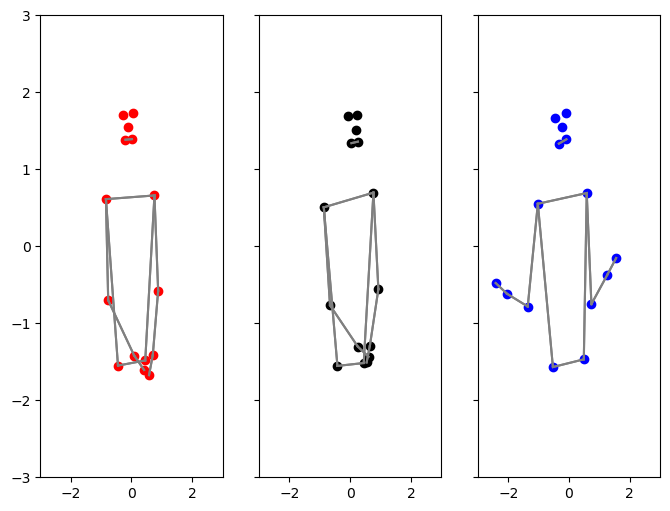

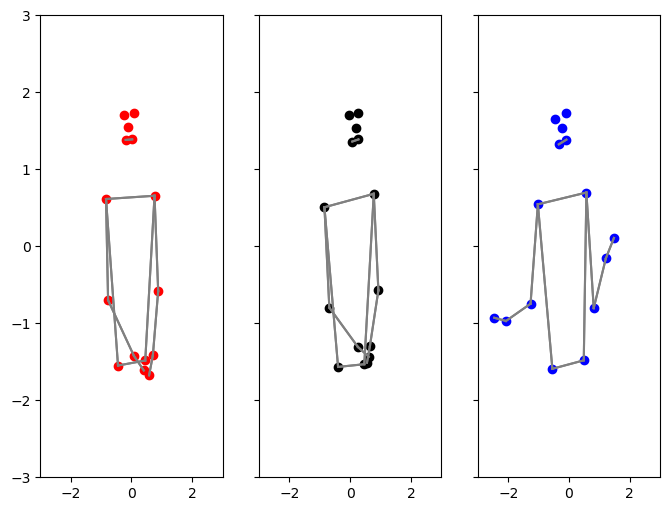

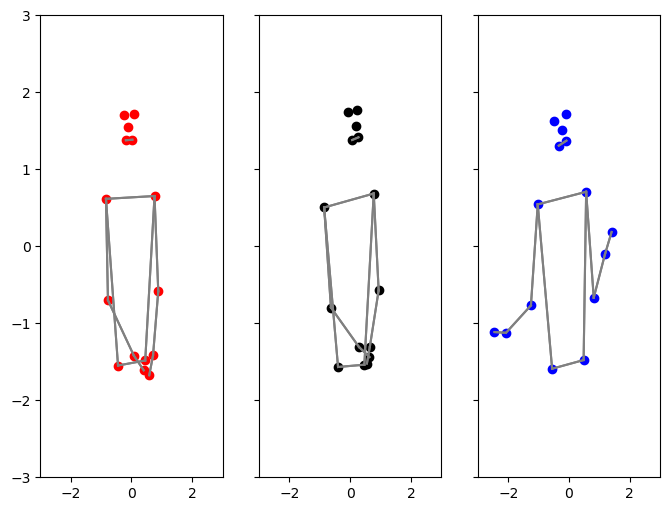

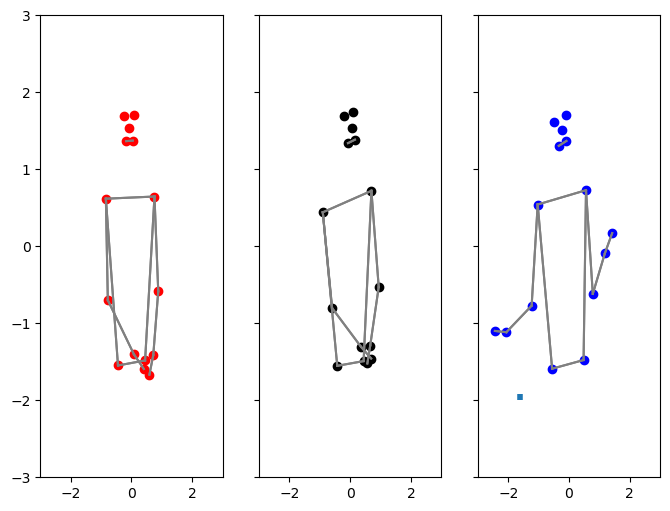

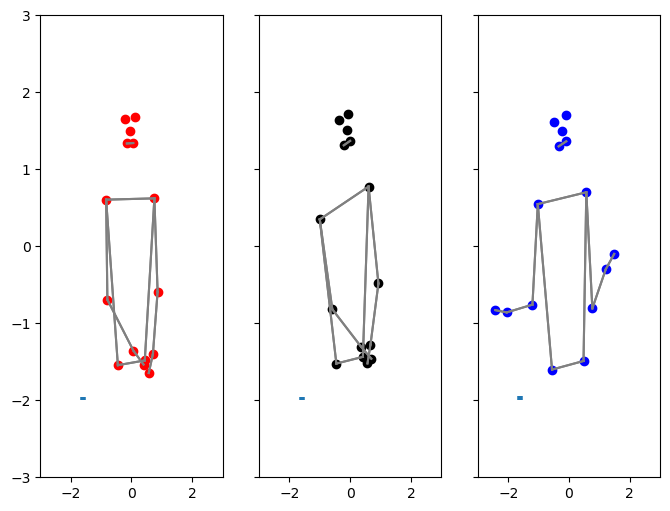

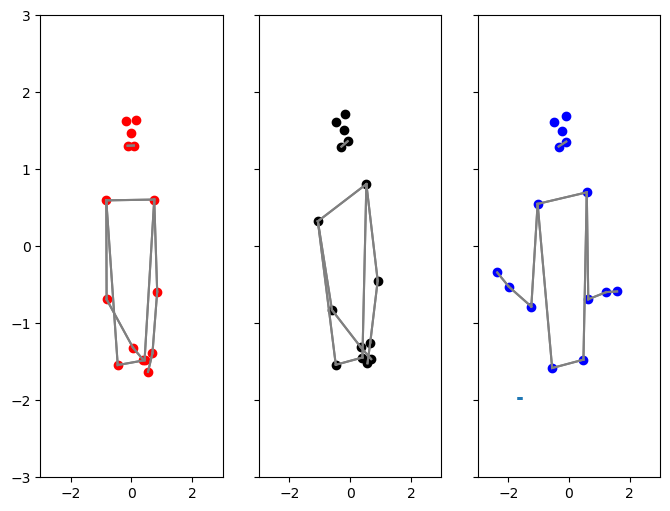

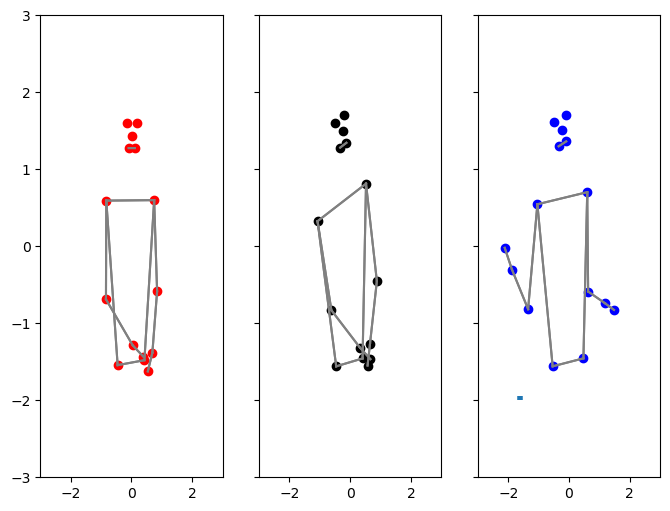

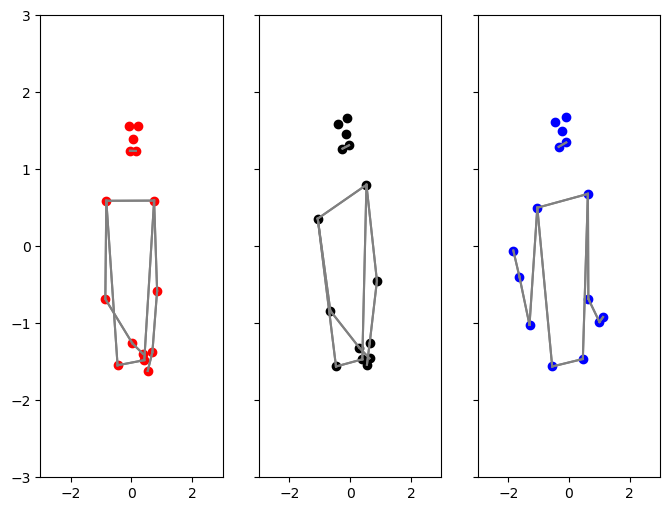

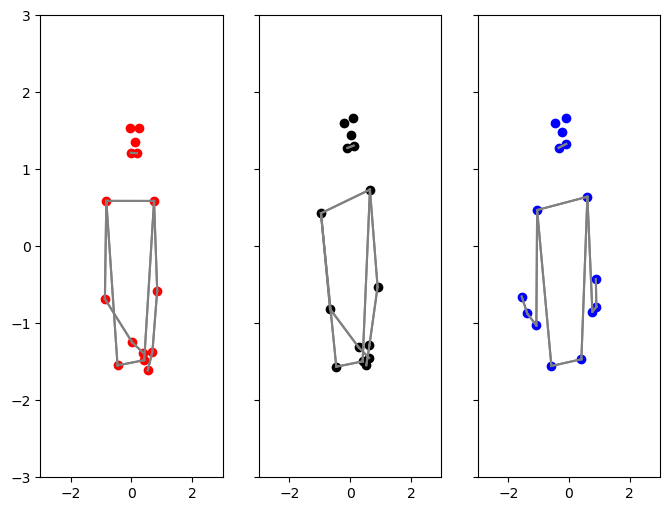

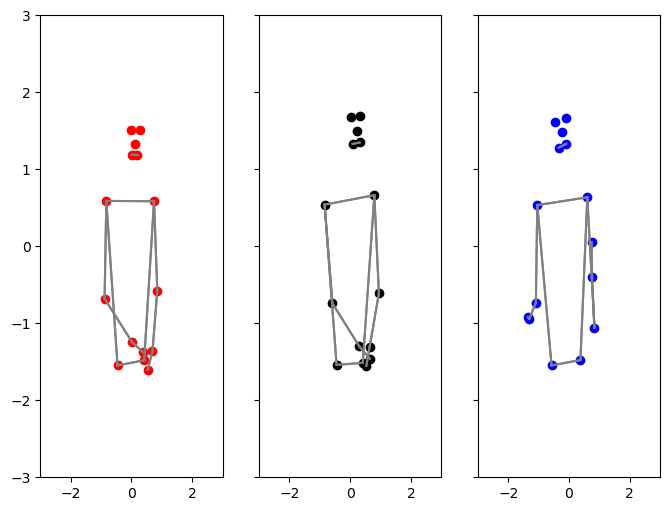

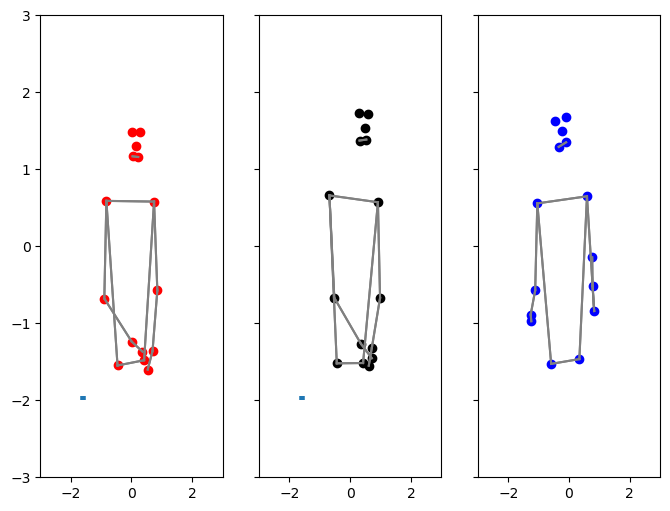

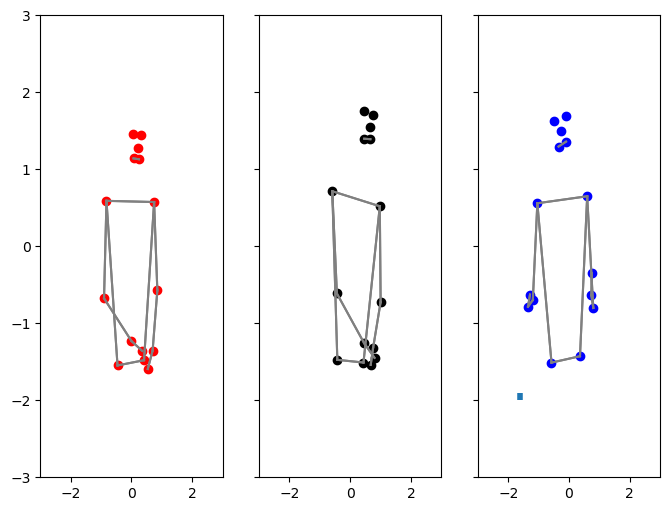

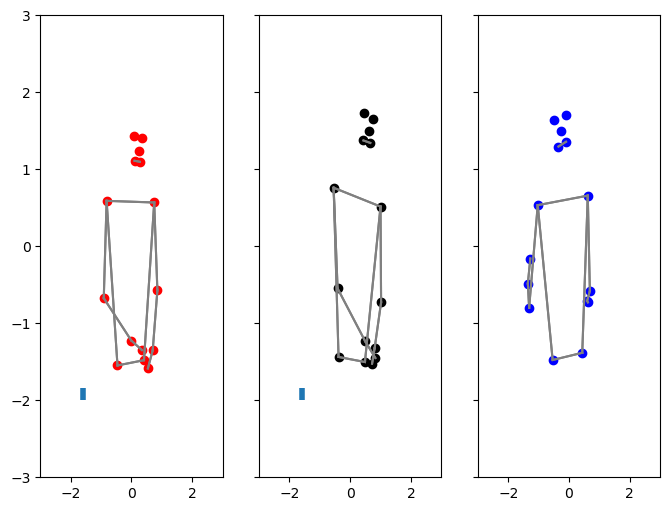

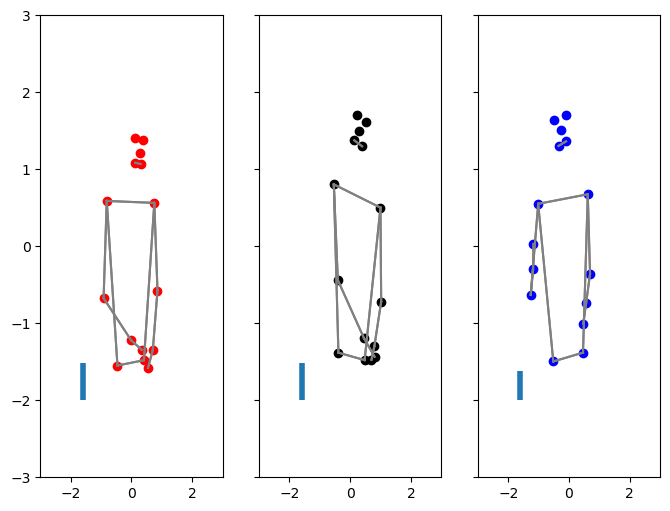

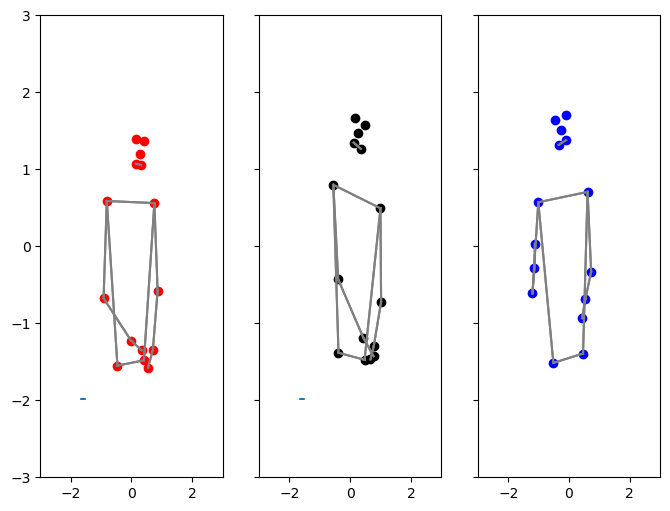

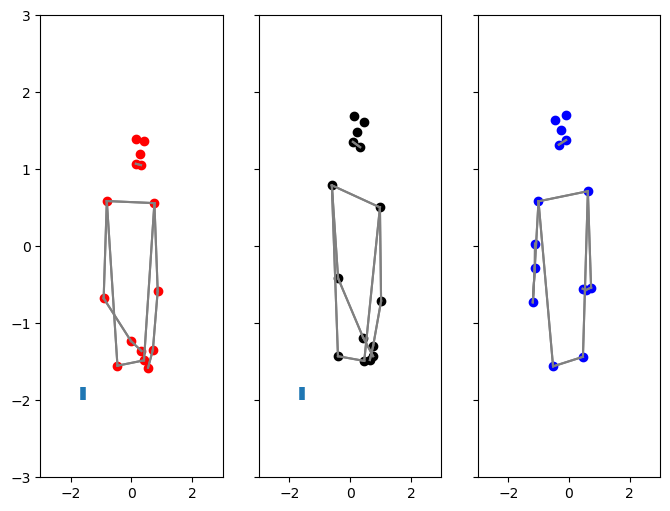

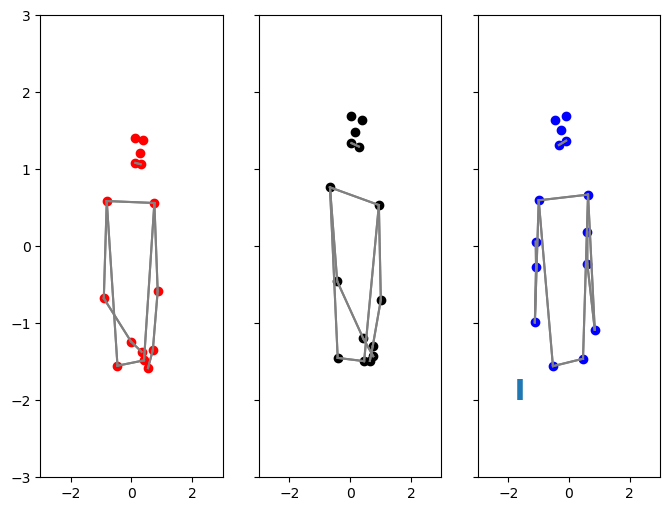

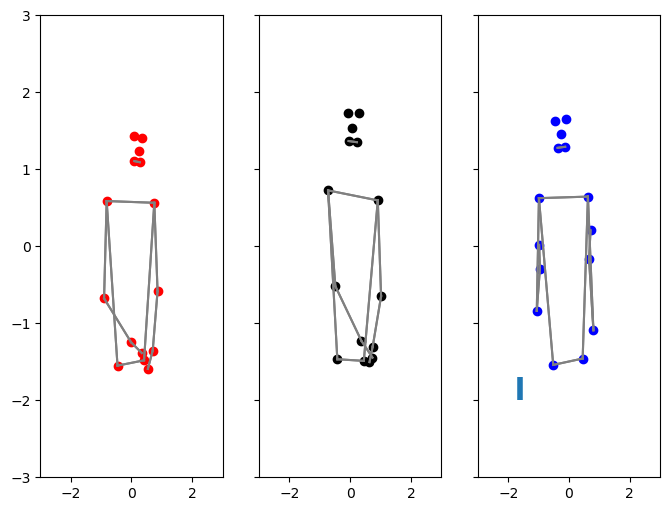

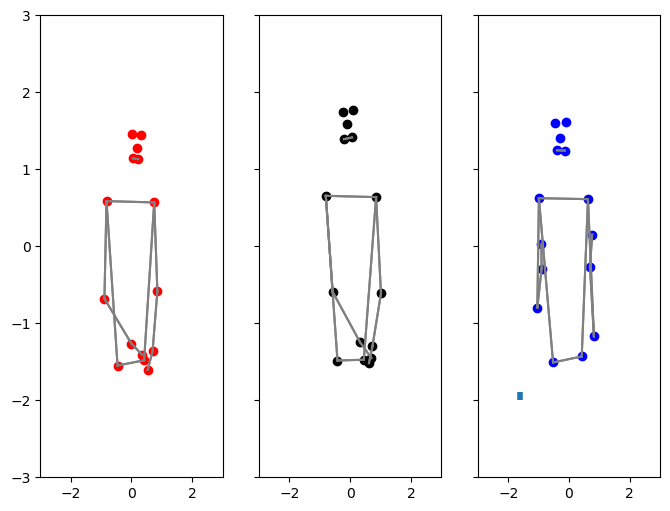

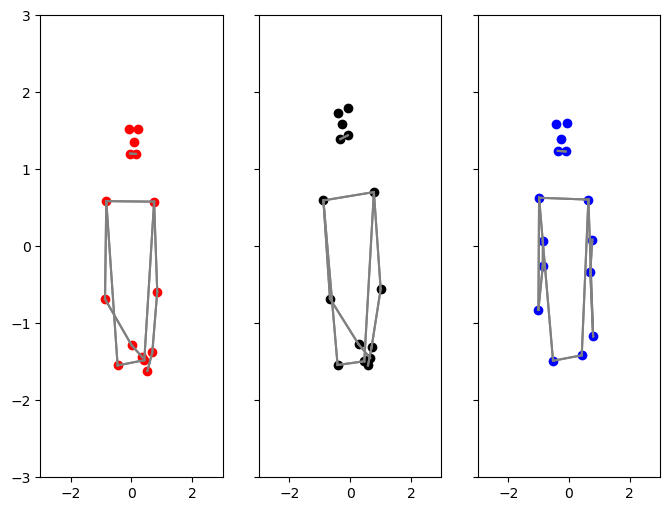

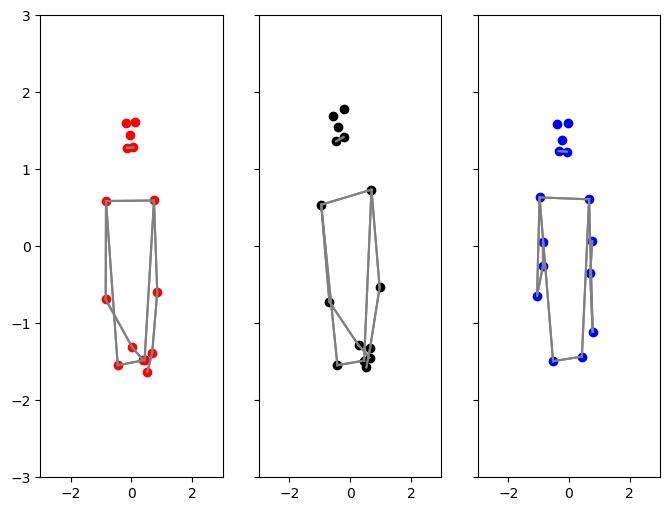

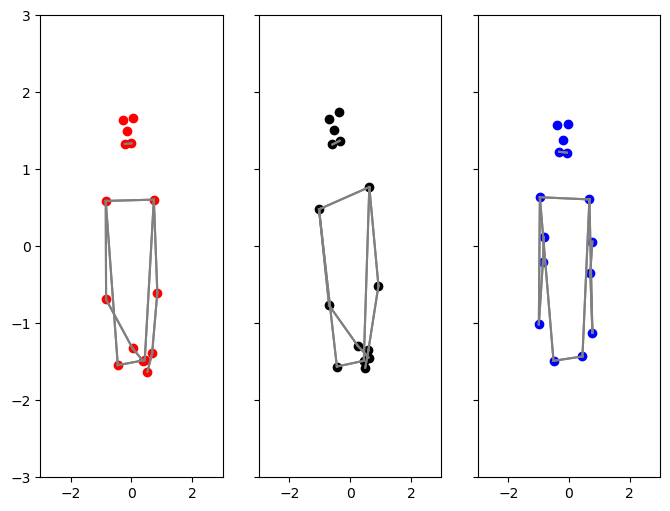

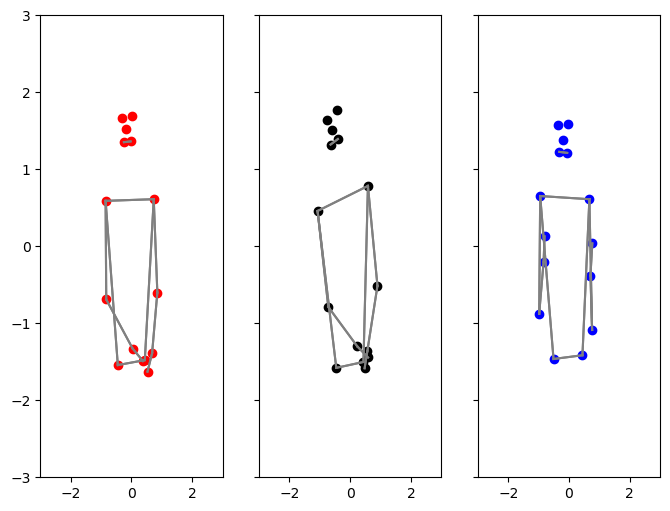

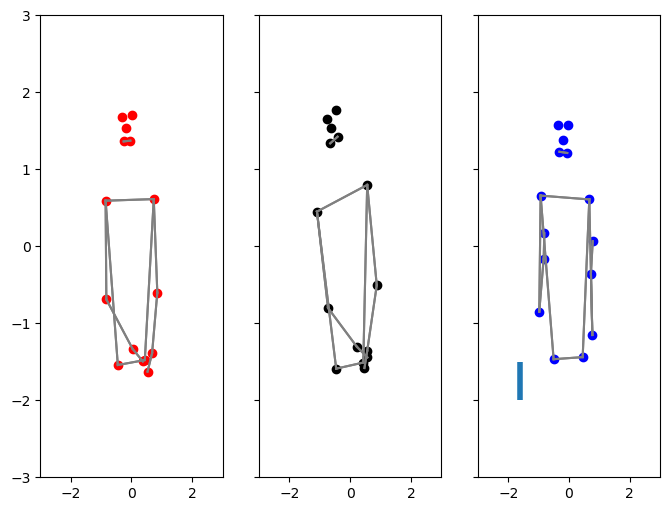

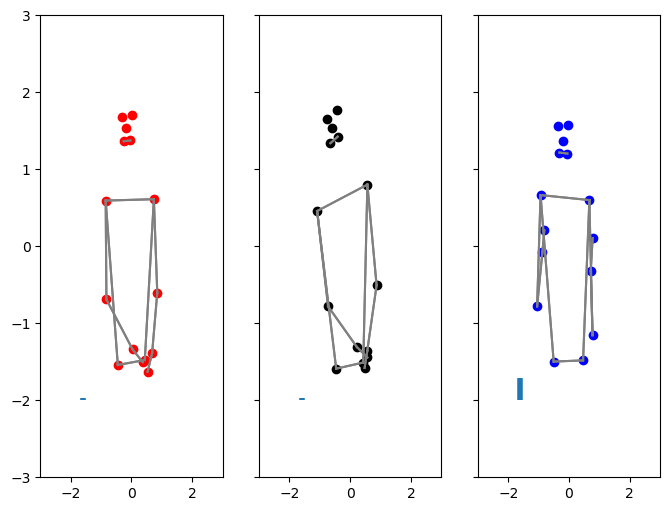

In [22]:
import matplotlib.animation as animation
from utils.utils import plt_mediapipe_pose
save = False
image_display = True
fps = 5
est = False
mov_idx = 1502
#if est:
d_r = result_all[mov_idx, 0, tlen//2:, :]
#else:
d_t = data_all[mov_idx, 0, tlen//2:, :]
d_p = data_all[mov_idx, 1, tlen//2:, :]
def update(i):
    x_w = 1.5
    y_w = 1.5
    ax[0].cla()
    ax[0].set_xlim(-x_w*2, x_w*2)
    ax[0].set_ylim(-y_w*2, y_w*2)
    ax[1].cla()
    ax[1].set_xlim(-x_w*2, x_w*2)
    ax[1].set_ylim(-y_w*2, y_w*2)
    ax[2].cla()
    ax[2].set_xlim(-x_w*2, x_w*2)
    ax[2].set_ylim(-y_w*2, y_w*2)
    if mode != "true":
        pose_vector1 = d_r[i]
    else:
        pose_vector1 = d_t[i]
    pose_vector2 = d_t[i]
    pose_vector3 = d_p[i]
    #pose_vector2[::2] = pose_vector2[::2] 
    plt_mediapipe_pose(pose_vector1, ax[0], size=[x_w, y_w], color="red") #generated result
    plt_mediapipe_pose(pose_vector2, ax[1], size=[x_w, y_w], color="black") # copy
    plt_mediapipe_pose(pose_vector3, ax[2], size=[x_w, y_w], color="blue") # conversation partnermv 
    plt.show()
    #if save:
    #    fig.savefig(f"./img_for_movie/ddpm_img_{i}.png")
if image_display:
    fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(8,6))

    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    for i in range(tlen//2):
        update(i)
        plt.show()
else:
    fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(8,6))

    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ani = animation.FuncAnimation(fig, update, len(d_t), interval=1000/fps)

In [18]:
#from IPython.display import HTML
#display(HTML(ani.to_jshtml()))
#plt.close()